# XNATpy

### https://xnat.readthedocs.io/en/latest/index.html

#### XNATpy is supposedly easier to use than pyXNAT but unlike the latter, it is not possible to create subjects or sessions.  See:

#### https://info.dpuk.org/blog/

In [69]:
import xnat
#xnat.__version__ # 0.3.21
print(f'XNATpy version = {xnat.__version__}') # 0.3.21
import SimpleITK as sitk
import pydicom
import dicom2nifti
import numpy as np
#import math
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import matplotlib.image as mpimg
import os, sys, time
import natsort
import dicom_functions
import explore_dicom_data
from myshow import myshow
import importlib

XNATpy version = 0.3.21


# Connect to XNAT server:

In [2]:
xnatAddress = 'http://10.1.1.17'
#xnatAddress = 'http://10.1.1.17/app/template/Index.vm'
#xnatAddress = 'http://10.1.1.17/app/template/Login.vm#!'
#xnatAddress = 'http://10.1.1.17:8080/xnat'
#xnatAddress = 'http://10.1.1.17:80/xnat'
#xnatAddress = 'http://localhost:8080/xnat'
#xnatAddress = 'http://10.1.1.17:8080/admin'
#xnatAddress = 'http://localhost:8080/admin'

#session = xnat.connect(xnatAddress, user='xnat', password='xnat')
#session = xnat.connect(xnatAddress, user='owner', password='owner')
session = xnat.connect(xnatAddress, user='admin', password='admin')

In [3]:
session

# Figure out how to index info of interest:

In [3]:
session.projects

<XNATListing {(BrainTumorProg, Brain-Tumor-Progression Collection): <ProjectData Brain-Tumor-Progression Collection (BrainTumorProg)>, (SN2015Neuro, Softneta 2015-04-30 Neuro): <ProjectData Softneta 2015-04-30 Neuro (SN2015Neuro)>}>

In [4]:
session.projects[0]

<ProjectData Brain-Tumor-Progression Collection (BrainTumorProg)>

In [5]:
session.projects[0].subjects

<XNATListing {(XNAT_S00001, PGBM-001): <SubjectData PGBM-001 (XNAT_S00001)>, (XNAT_S00002, PGM-002): <SubjectData PGM-002 (XNAT_S00002)>, (XNAT_S00003, PGBM-003): <SubjectData PGBM-003 (XNAT_S00003)>}>

In [28]:
session.projects[0].subjects[1]

<SubjectData PGM-002 (XNAT_S00002)>

In [29]:
session.projects[0].subjects[1].experiments

<XNATListing {(XNAT_E00004, PGM-002_MR_1): <MrSessionData PGM-002_MR_1 (XNAT_E00004)>, (XNAT_E00005, PGM-002_MR_2): <MrSessionData PGM-002_MR_2 (XNAT_E00005)>}>

In [30]:
session.projects[0].subjects[1].experiments[0]

<MrSessionData PGM-002_MR_1 (XNAT_E00004)>

In [31]:
session.projects[0].subjects[1].experiments[0].scans

<XNATListing {(11, T1post): <MrScanData T1post (11)>, (19446, T1pre_reg): <MrScanData T1pre_reg (19446)>, (36449, FLAIR_reg): <MrScanData FLAIR_reg (36449)>, (37921, T2_reg): <MrScanData T2_reg (37921)>, (36456, nCBF_reg): <ScScanData nCBF_reg (36456)>, (36450, ADC_reg): <ScScanData ADC_reg (36450)>, (36454, nRCBV_reg): <ScScanData nRCBV_reg (36454)>, (5394, Mask_Tumor): <ScScanData Mask_Tumor (5394)>, (14409, dT1): <ScScanData dT1 (14409)>, (36455, sRCBV_reg): <ScScanData sRCBV_reg (36455)>}>

In [32]:
session.projects[0].subjects[1].experiments[0].scans[0]

<MrScanData T1post (11)>

In [55]:
#session.projects[0].subjects[2].experiments[0].scans[0].files
session.projects[0].subjects[1].experiments[0].scans[0].files.values()
list(session.projects[0].subjects[1].experiments[0].scans[0].files.values())

[<FileData /data/experiments/XNAT_E00004/scans/11/resources/51/files/XNAT_E00004_11_qc.gif (XNAT_E00004_11_qc.gif)>,
 <FileData /data/experiments/XNAT_E00004/scans/11/resources/51/files/XNAT_E00004_11_qc_t.gif (XNAT_E00004_11_qc_t.gif)>,
 <FileData /data/experiments/XNAT_E00004/scans/11/resources/41/files/1.3.6.1.4.1.14519.5.2.1.4429.7055.331058148523327901159449546313-11-19-abhab5.dcm (1.3.6.1.4.1.14519.5.2.1.4429.7055.331058148523327901159449546313-11-19-abhab5.dcm)>,
 <FileData /data/experiments/XNAT_E00004/scans/11/resources/41/files/1.3.6.1.4.1.14519.5.2.1.4429.7055.331058148523327901159449546313-11-20-hn94uu.dcm (1.3.6.1.4.1.14519.5.2.1.4429.7055.331058148523327901159449546313-11-20-hn94uu.dcm)>,
 <FileData /data/experiments/XNAT_E00004/scans/11/resources/41/files/1.3.6.1.4.1.14519.5.2.1.4429.7055.331058148523327901159449546313-11-1-xb6jdm.dcm (1.3.6.1.4.1.14519.5.2.1.4429.7055.331058148523327901159449546313-11-1-xb6jdm.dcm)>,
 <FileData /data/experiments/XNAT_E00004/scans/11/res

In [56]:
len(session.projects[0].subjects[1].experiments[0].scans[0].files.values())

24

In [37]:
session.projects[0].subjects[1].experiments[0].resources

<XNATListing {}>

In [40]:
session.projects[0].subjects[1].resources

<XNATListing {}>

In [35]:
session.projects[0].subjects[1].experiments[0].assessors

<XNATListing {(RoiCollection_hmLLIVL_3CIMUS3xut4, AIM_20200123_145716): <RoiCollectionData AIM_20200123_145716 (RoiCollection_hmLLIVL_3CIMUS3xut4)>}>

In [41]:
session.projects[0].subjects[1].experiments[0].assessors[0]

<RoiCollectionData AIM_20200123_145716 (RoiCollection_hmLLIVL_3CIMUS3xut4)>

In [47]:
session.projects[0].subjects[1].experiments[0].assessors[0].values()

AttributeError: 'RoiCollectionData' object has no attribute 'values'

In [4]:
# Define selected project and subject labels, and session number:
projectLabel = 'BrainTumorProg'
subjectLabel = 'PGM-002'
sessionNo = 0 # (= 1 in XNAT web app; e.g. ‘PGM-002_MR_1’)

session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors

<XNATListing {(RoiCollection_hmLLIVL_3CIMUS3xut4, AIM_20200123_145716): <RoiCollectionData AIM_20200123_145716 (RoiCollection_hmLLIVL_3CIMUS3xut4)>}>

In [176]:
session.projects[0].subjects[1].experiments[0].assessors[0]

<RoiCollectionData AIM_20200123_145716 (RoiCollection_hmLLIVL_3CIMUS3xut4)>

In [177]:
session.projects[0].subjects[1].experiments[0].assessors[0].resources

<XNATListing {(141, AIM): <ResourceCatalog AIM (141)>, (142, RTSTRUCT): <ResourceCatalog RTSTRUCT (142)>}>

In [10]:
session.projects[0].subjects[1].experiments[0].assessors[0].resources[0]

<ResourceCatalog AIM (141)>

In [11]:
session.projects[0].subjects[1].experiments[0].assessors[0].resources['AIM']

<ResourceCatalog AIM (141)>

In [15]:
session.projects[0].subjects[1].experiments[0].assessors[0].resources[1]

<ResourceCatalog RTSTRUCT (142)>

In [16]:
session.projects[0].subjects[1].experiments[0].assessors[0].resources['RTSTRUCT']

<ResourceCatalog RTSTRUCT (142)>

# Define the REST path variables:

In [36]:
# Define selected project and subject labels, and session number:
projectLabel = 'BrainTumorProg'
subjectLabel = 'PGM-002'
experimentNo = 0 # (= 1 in XNAT web app; e.g. ‘PGM-002_MR_1’)
scanNo = 0 # 0 -> T1post

In [18]:
session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors

<XNATListing {(RoiCollection_hmLLIVL_3CIMUS3xut4, AIM_20200123_145716): <RoiCollectionData AIM_20200123_145716 (RoiCollection_hmLLIVL_3CIMUS3xut4)>}>

In [19]:
session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors['RoiCollectionData']

KeyError: 'Could not find ID/label RoiCollectionData in collection!'

In [20]:
session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors['RoiCollection_hmLLIVL_3CIMUS3xut4']

<RoiCollectionData AIM_20200123_145716 (RoiCollection_hmLLIVL_3CIMUS3xut4)>

In [21]:
session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors['RoiCollection_hmLLIVL_3CIMUS3xut4'].open()

AttributeError: 'RoiCollectionData' object has no attribute 'open'

In [24]:
session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors[0]

<RoiCollectionData AIM_20200123_145716 (RoiCollection_hmLLIVL_3CIMUS3xut4)>

In [26]:
session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors[0].resources[0]

<ResourceCatalog AIM (141)>

In [27]:
session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors[0].resources[1]

<ResourceCatalog RTSTRUCT (142)>

# Download the DICOM-RTStruct file:

In [28]:
session.projects[projectLabel].subjects[subjectLabel].experiments[sessionNo].assessors[0].resources[1].download
# file was downloaded to the "Downloads" folder

<bound method AbstractResource.download of <ResourceCatalog RTSTRUCT (142)>>

# #######################################################

# Define the directory to download files from XNAT:

In [38]:
downloadDir = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff\XNAT downloads'

# Create a sub-directory for this projectLabel:
newPath = os.path.join(downloadDir, projectLabel)
try:
    os.mkdir(newPath)
    print('Directory', projectLabel, 'created')
except FileExistsError:
    print('Directory', projectLabel, 'already exists')

# Create a sub-directory for this subjectLabel:
newPath = os.path.join(newPath, subjectLabel)
try:
    os.mkdir(newPath)
    print('Directory', subjectLabel, 'created')
except FileExistsError:
    print('Directory', subjectLabel, 'already exists')

# Create a sub-directory for this experimentNo:
newPath = os.path.join(newPath, str(experimentNo))
try:
    os.mkdir(newPath)
    print('Directory', experimentNo, 'created')
except FileExistsError:
    print('Directory', experimentNo, 'already exists')

# Crete a sub-directory for this scanNo:
newPath = os.path.join(newPath, str(scanNo))
try:
    os.mkdir(newPath)
    print('Directory', scanNo, 'created')
except FileExistsError:
    print('Directory', scanNo, 'already exists')

Directory BrainTumorProg already exists
Directory PGM-002 already exists
Directory 0 created
Directory 0 created


In [43]:
# Download the DICOM-RTStruct file to newPath:
ROIobject = session.projects[projectLabel].subjects[subjectLabel].experiments[experimentNo].assessors[scanNo].resources[1]
ROIobject.download_dir(newPath)

157.8 KiB |#                                                      |  78.8 MiB/s


In [50]:
# Download the DICOM scans that correspond to the DICOM-RTStruct file:
scans = session.projects[projectLabel].subjects[subjectLabel].experiments[experimentNo].scans[scanNo] # works
scans = session.projects[projectLabel].subjects[subjectLabel].experiments[experimentNo].scans[0] # works
scans.download_dir[newPath] # for some reason this doesn't work...

TypeError: 'method' object is not subscriptable

In [51]:
# I don't understand why the above commands didn't work but this does:
session.projects[projectLabel].subjects[subjectLabel].experiments[experimentNo].scans[0].download_dir(newPath)

 11.9 MiB |  #                                                    |  47.7 MiB/s


In [53]:
scans

<MrScanData T1post (11)>

# Now load the DICOM series in pydicom:

In [170]:
# The DICOM files were exported here:
dicomsPath = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff\XNAT downloads\BrainTumorProg\PGM-002\0\0\PGM-002_MR_1\scans\11-T1post\resources\DICOM\files'

# And the ROI DICOM-RTStruct file was exported here:
roiPath = r'C:\Users\ctorti\Documents\GitHub\WP1.3_multiple_modalities\trying stuff\XNAT downloads\BrainTumorProg\PGM-002\0\0\AIM_20200123_145716\out\resources\RTSTRUCT\files'

# Load the DICOM series:
#frames = explore_dicom_data.load_dicom(dicomsPath)

# Reload explore_dicom_data.py since I added a new helper function called "load_dicoms_natsort":
importlib.reload(explore_dicom_data) 

# Load the DICOM series using natsort:
frames = explore_dicom_data.load_dicoms_natsort(dicomsPath)

In [171]:
np.shape(frames)

(22,)

In [172]:
Nframes = len(frames)

np.int8(np.round(np.sqrt(Nframes)))

5

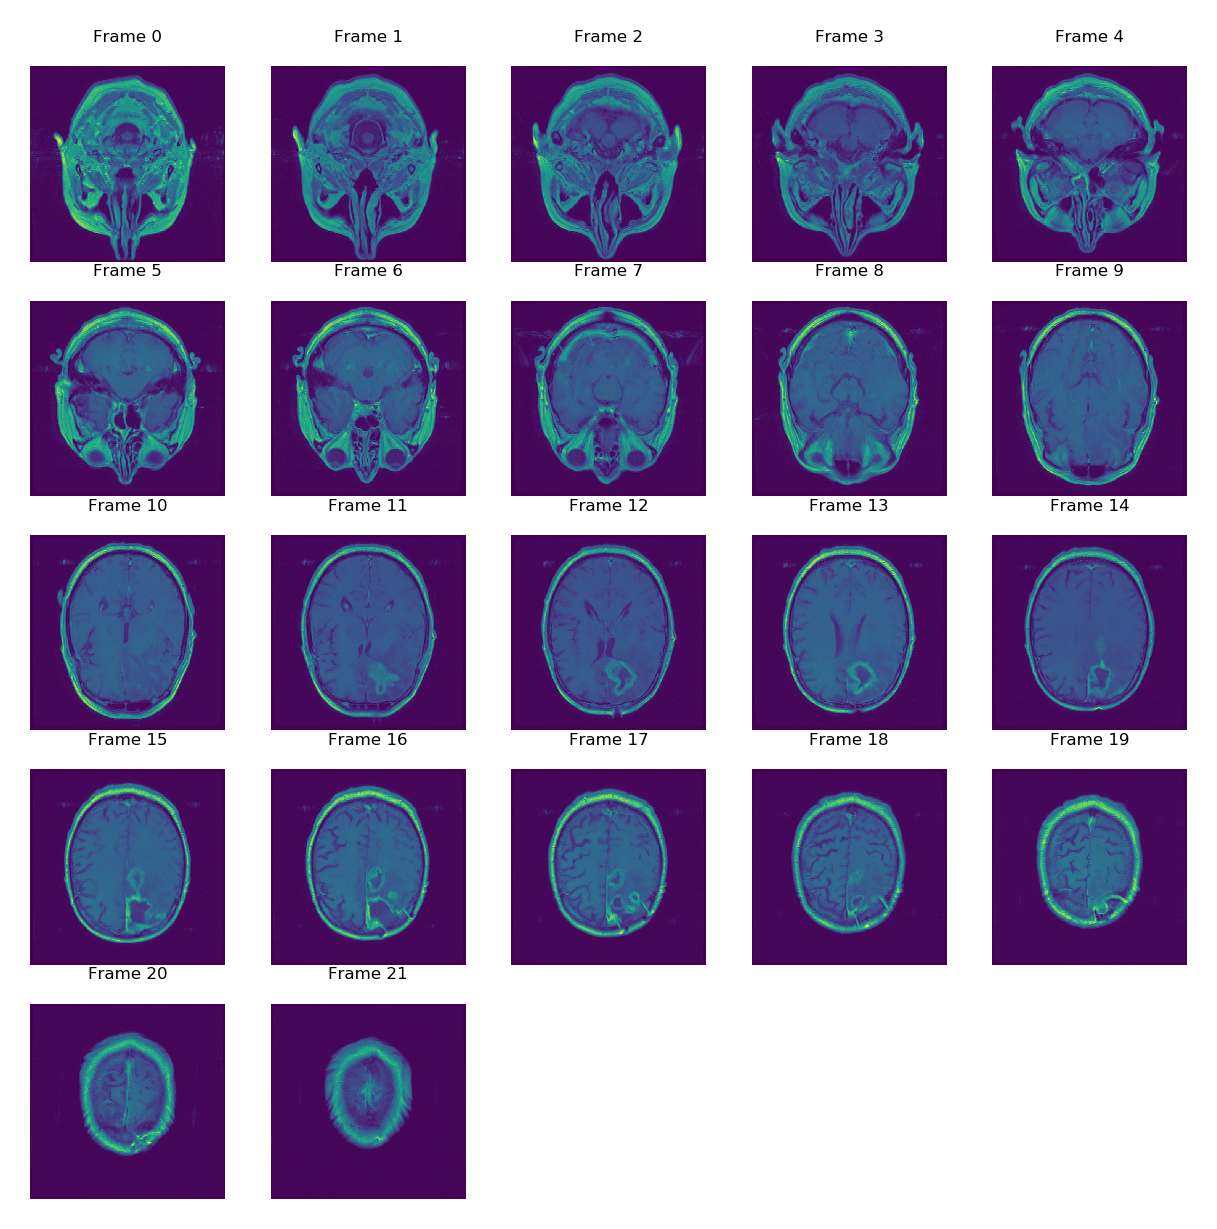

In [173]:
# Configure plot:

# Set the title font:
fontSize=4

# Set the number of subplot rows and columns:
rows = np.int8(np.round(np.sqrt(Nframes)))
cols = np.int8(np.round(np.sqrt(Nframes)))

plt.figure(figsize=(5,5), dpi=300);

i = 0 # for subplot pos

for f in range(Nframes):   
    # This frame:
    frame = frames[f].pixel_array
        
    # Plot:
    i = i + 1    
    plt.subplot(rows,cols,i, aspect='equal')
    plt.pcolormesh(frame);
    plt.title(f'Frame {f}', size=fontSize);
    plt.axis('off');

        
#plt.savefig('{} {} - all frames.jpg'.format(seriesModality, seriesName), bbox_inches='tight')

In [166]:
frames

[(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
 (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
 (0008, 0016) SOP Class UID                       UI: MR Image Storage
 (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.261648268414748489539476953118
 (0008, 0020) Study Date                          DA: '19960813'
 (0008, 0021) Series Date                         DA: '19960813'
 (0008, 0022) Acquisition Date                    DA: '19960813'
 (0008, 0023) Content Date                        DA: '19960813'
 (0008, 0030) Study Time                          TM: '164104.000000'
 (0008, 0031) Series Time                         TM: '162908'
 (0008, 0032) Acquisition Time                    TM: '162908'
 (0008, 0033) Content Time                        TM: '162908'
 (0008, 0050) Accession Number                    SH: '7351166753651521'
 (0008, 0060) Modality                            CS: 'MR'
 (000

In [175]:
frames.dir('image')

AttributeError: 'list' object has no attribute 'dir'

In [174]:
frame[0].dir('image')

AttributeError: 'numpy.ndarray' object has no attribute 'dir'

# --> Looks like storing DICOMS into a numpy array is a problem - pydicom doesn't seem to recognise the data as DICOM

# May need to find another way of storing the DICOMs.

# So rather than reading all DICOMS and storing them in a numpy array, instead use the helper function dc_filepaths() to find their file paths, load each DICOM, get the info required within for loop:

In [185]:
dicomsFpaths = dicom_functions.dc_filepaths(dicomsPath)
#list(dicomsFpaths)

for fpath in dicomsFpaths:
    dicom = pydicom.read_file(fpath)
    print(dicom.dir('image'))

In [211]:
pydicom.read_file(dicomsFpaths[11])

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.320280293613596547840725755465
(0008, 0020) Study Date                          DA: '19960813'
(0008, 0021) Series Date                         DA: '19960813'
(0008, 0022) Acquisition Date                    DA: '19960813'
(0008, 0023) Content Date                        DA: '19960813'
(0008, 0030) Study Time                          TM: '164104.000000'
(0008, 0031) Series Time                         TM: '162908'
(0008, 0032) Acquisition Time                    TM: '162908'
(0008, 0033) Content Time                        TM: '162908'
(0008, 0050) Accession Number                    SH: '7351166753651521'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufa

In [212]:
pydicom.read_file(dicomsFpaths[12])

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.677643793103545804182040061154
(0008, 0020) Study Date                          DA: '19960813'
(0008, 0021) Series Date                         DA: '19960813'
(0008, 0022) Acquisition Date                    DA: '19960813'
(0008, 0023) Content Date                        DA: '19960813'
(0008, 0030) Study Time                          TM: '164104.000000'
(0008, 0031) Series Time                         TM: '162908'
(0008, 0032) Acquisition Time                    TM: '162908'
(0008, 0033) Content Time                        TM: '162908'
(0008, 0050) Accession Number                    SH: '7351166753651521'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufa

# The UIDs that connect the individual DICOM scans to their associated contour UID are as follows:

# ReferencedSOPInstance UID in DICOM-RTStruct file = SOPInstanceUID in DICOM file

# roi.ROIContourSequence[0].ContourSequence[N].ContourImageSequence[0].ReferencedSOPInstanceUID

# = dicom.SOPInstanceUID

# where [N] is the contour sequence number (i.e. number of contours in RT-Struct file)

In [187]:
dicom.dir('image')

['CardiacNumberOfImages',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagesInAcquisition',
 'LargestImagePixelValue',
 'LossyImageCompression',
 'ReferencedImageSequence',
 'SmallestImagePixelValue']

In [207]:
dicom.dir('uid')

['FrameOfReferenceUID',
 'SOPClassUID',
 'SOPInstanceUID',
 'SeriesInstanceUID',
 'StudyInstanceUID']

In [188]:
dicom.ReferencedImageSequence

<Sequence, length 3>

In [189]:
dicom.ReferencedImageSequence[0]

(0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
(0008, 1155) Referenced SOP Instance UID         UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.161698063235862217165787373822

In [190]:
dicom.ReferencedImageSequence[0].ReferencedSOPInstanceUID

'1.3.6.1.4.1.14519.5.2.1.4429.7055.161698063235862217165787373822'

In [191]:
dicom.pixel_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [23, 22, 28, ..., 20,  0,  0],
       [15, 10, 12, ...,  9,  0,  0],
       [17, 13, 10, ...,  8,  0,  0]], dtype=int16)

In [202]:
len(dicomsFpaths)

22

# Store the UIDs (as keys) and pixel arrays in a dictionary:

In [276]:
# Include a "Frame number" which is just an arbitrary counter (starting from 1) to help
# make things clear.

dicomsDict = dict()

for f in range(len(dicomsFpaths)):
    fpath = dicomsFpaths[f]
    dicom = pydicom.read_file(fpath)
    sopInstanceUid = dicom.SOPInstanceUID
    #seriesInstanceUid = dicom.SeriesInstanceUID
    #studyInstanceUid = dicom.StudyInstanceUID
    #refSopInstanceUid = dicom.ReferencedImageSequence[0].ReferencedSOPInstanceUID
    pixelArray = dicom.pixel_array
    #print('sopInstanceUid =', sopInstanceUid)
    dicomsDict[sopInstanceUid] = {'Frame number':f+1, 'Pixel array':pixelArray}
    #dicomsDict.update({uid:{'Pixel array':pixelArray}})
    
dicomsDict

{'1.3.6.1.4.1.14519.5.2.1.4429.7055.261648268414748489539476953118': {'Frame number': 1,
  'Pixel array': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [23, 22, 28, ..., 20,  0,  0],
         [15, 10, 12, ...,  9,  0,  0],
         [17, 13, 10, ...,  8,  0,  0]], dtype=int16)},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.115664596007531053671073165944': {'Frame number': 2,
  'Pixel array': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  8, 18, ...,  0,  0,  0],
         [ 0,  6, 13, ...,  0,  0,  0],
         [ 0,  3,  8, ...,  0,  0,  0]], dtype=int16)},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.169453162220744499902187774507': {'Frame number': 3,
  'Pixel array': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 1, ..., 0, 0, 0]

# Now see what can be done with the DICOM-RTStuct file in pydicom:

In [95]:
# Load the DICOM-RTStruct file:
roi = explore_dicom_data.load_dicoms_natsort(roiPath)

roi

[(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage
 (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.534147.578.4208788039.20200231457312
 (0008, 0020) Study Date                          DA: '19960813'
 (0008, 0030) Study Time                          TM: '162908'
 (0008, 0050) Accession Number                    SH: ''
 (0008, 0060) Modality                            CS: 'RTSTRUCT'
 (0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS'
 (0008, 0090) Referring Physician's Name          PN: ''
 (0008, 1070) Operators' Name                     PN: ''
 (0008, 1090) Manufacturer's Model Name           LO: 'Optima MR450w'
 (0010, 0010) Patient's Name                      PN: 'PGM-002'
 (0010, 0020) Patient ID                          LO: 'PGM-002_MR_1'
 (0010, 0030) Patient's Birth Date                DA: '00021130'
 (0010, 0040) Patient's Sex                       CS: 'M'
 (0018, 1020) Software Version(s)                 LO:

In [96]:
# Because the load_dicoms_natsort() function stored the DICOM in a numpy array, need to index the first element:
roi = roi[0]
roi

(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.534147.578.4208788039.20200231457312
(0008, 0020) Study Date                          DA: '19960813'
(0008, 0030) Study Time                          TM: '162908'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'RTSTRUCT'
(0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1070) Operators' Name                     PN: ''
(0008, 1090) Manufacturer's Model Name           LO: 'Optima MR450w'
(0010, 0010) Patient's Name                      PN: 'PGM-002'
(0010, 0020) Patient ID                          LO: 'PGM-002_MR_1'
(0010, 0030) Patient's Birth Date                DA: '00021130'
(0010, 0040) Patient's Sex                       CS: 'M'
(0018, 1020) Software Version(s)                 LO: ['25', 'LX', '

In [119]:
roi.items()

dict_items([((0008, 0016), (0008, 0016) SOP Class UID                       UI: RT Structure Set Storage), ((0008, 0018), (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.534147.578.4208788039.20200231457312), ((0008, 0020), (0008, 0020) Study Date                          DA: '19960813'), ((0008, 0030), (0008, 0030) Study Time                          TM: '162908'), ((0008, 0050), (0008, 0050) Accession Number                    SH: ''), ((0008, 0060), (0008, 0060) Modality                            CS: 'RTSTRUCT'), ((0008, 0070), (0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS'), ((0008, 0090), (0008, 0090) Referring Physician's Name          PN: ''), ((0008, 1070), (0008, 1070) Operators' Name                     PN: ''), ((0008, 1090), (0008, 1090) Manufacturer's Model Name           LO: 'Optima MR450w'), ((0010, 0010), (0010, 0010) Patient's Name                      PN: 'PGM-002'), ((0010, 0020), (0010, 0020) Patient ID                   

In [108]:
roi.values()

dict_values([(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage, (0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.534147.578.4208788039.20200231457312, (0008, 0020) Study Date                          DA: '19960813', (0008, 0030) Study Time                          TM: '162908', (0008, 0050) Accession Number                    SH: '', (0008, 0060) Modality                            CS: 'RTSTRUCT', (0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS', (0008, 0090) Referring Physician's Name          PN: '', (0008, 1070) Operators' Name                     PN: '', (0008, 1090) Manufacturer's Model Name           LO: 'Optima MR450w', (0010, 0010) Patient's Name                      PN: 'PGM-002', (0010, 0020) Patient ID                          LO: 'PGM-002_MR_1', (0010, 0030) Patient's Birth Date                DA: '00021130', (0010, 0040) Patient's Sex                       CS: 'M', (0018, 1020) Software Version(s)        

In [120]:
roi.keys()

dict_keys([(0008, 0016), (0008, 0018), (0008, 0020), (0008, 0030), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1070), (0008, 1090), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0018, 1020), (0020, 000d), (0020, 000e), (0020, 0010), (0020, 0011), (0020, 0052), (0020, 1040), (3006, 0002), (3006, 0008), (3006, 0009), (3006, 0010), (3006, 0020), (3006, 0039), (3006, 0080)])

In [116]:
roi.elements()

<generator object Dataset.elements at 0x0000023D81761348>

In [143]:
for elem in roi.elements():
    print(elem)

(0008, 0016) SOP Class UID                       UI: RT Structure Set Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.534147.578.4208788039.20200231457312
(0008, 0020) Study Date                          DA: '19960813'
(0008, 0030) Study Time                          TM: '162908'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'RTSTRUCT'
(0008, 0070) Manufacturer                        LO: 'GE MEDICAL SYSTEMS'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1070) Operators' Name                     PN: ''
(0008, 1090) Manufacturer's Model Name           LO: 'Optima MR450w'
(0010, 0010) Patient's Name                      PN: 'PGM-002'
(0010, 0020) Patient ID                          LO: 'PGM-002_MR_1'
(0010, 0030) Patient's Birth Date                DA: '00021130'
(0010, 0040) Patient's Sex                       CS: 'M'
(0018, 1020) Software Version(s)                 LO: ['25', 'LX', '

In [144]:
roi.elements()[0] # not sure why this didn't work..

TypeError: 'generator' object is not subscriptable

In [104]:
roi.PatientName

'PGM-002'

In [107]:
roi.data_element('PatientName')

(0010, 0010) Patient's Name                      PN: 'PGM-002'

In [117]:
roi.get('PatientName')

'PGM-002'

In [118]:
roi.get_item('PatientName')

(0010, 0010) Patient's Name                      PN: 'PGM-002'

In [105]:
roi[0x10,0x10]

(0010, 0010) Patient's Name                      PN: 'PGM-002'

In [106]:
roi[0x10,0x10].value

'PGM-002'

In [122]:
# Search to any tags with 'roi' in the keyword:
roi.dir('roi')

['ROIContourSequence', 'RTROIObservationsSequence', 'StructureSetROISequence']

In [99]:
roi.StructureSetROISequence

<Sequence, length 1>

In [121]:
# Search to any tags with 'contour' in the keyword:
roi.dir('contour')

['ROIContourSequence']

In [128]:
roi.ROIContourSequence

<Sequence, length 1>

In [123]:
# Search to any tags with 'rtstruc' in the keyword:
roi.dir('rtstruc')

[]

In [127]:
roi[3006,0042]

SyntaxError: invalid token (<ipython-input-127-2672600c2ef5>, line 1)

In [126]:
roi[3x06,0x42]

SyntaxError: invalid syntax (<ipython-input-126-2f4c5d1fd6f5>, line 1)

In [178]:
# Not sure why this doesn't work...
pydicom.dcmread(roiPath)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\ctorti\\Documents\\GitHub\\WP1.3_multiple_modalities\\trying stuff\\XNAT downloads\\BrainTumorProg\\PGM-002\\0\\0\\AIM_20200123_145716\\out\\resources\\RTSTRUCT\\files'

In [129]:
# Search to any tags with 'roi' in the keyword:
roi.dir('roi')

['ROIContourSequence', 'RTROIObservationsSequence', 'StructureSetROISequence']

In [130]:
# Search to any tags with 'contour' in the keyword:
roi.dir('contour')

['ROIContourSequence']

In [134]:
roi.data_element('StructureSetROISequence')

<Sequence, length 1>

In [132]:
roi.get('StructureSetROISequence')

<Sequence, length 1>

In [133]:
roi.get_item('StructureSetROISequence')

<Sequence, length 1>

In [137]:
roi.get_item('StructureSetROISequence').value

<Sequence, length 1>

In [139]:
roi.values('StructureSetROISequence')

TypeError: values() takes 1 positional argument but 2 were given

In [128]:
roi.ROIContourSequence

<Sequence, length 1>

In [145]:
roi.ROIContourSequence.elements() # annoyingly .elements() doesn't work in a nested fashion

AttributeError: 'Sequence' object has no attribute 'elements'

In [147]:
roi.ROIContourSequence.dir('contour') # same for .dir()

AttributeError: 'Sequence' object has no attribute 'dir'

In [180]:
roi.ROIContourSequence.get('ContourSequence') # didn't work because it's a list? See below..

AttributeError: 'Sequence' object has no attribute 'get'

In [159]:
roi.ROIContourSequence[0]

(3006, 0040)  Contour Sequence   16 item(s) ---- 
   (3006, 0016)  Contour Image Sequence   1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.320280293613596547840725755465
      (0008, 1160) Referenced Frame Number             IS: "1"
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points            IS: "213"
   (3006, 0048) Contour Number                      IS: "1"
   (3006, 0050) Contour Data                        DS: Array of 639 elements
   ---------
   (3006, 0016)  Contour Image Sequence   1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: MR Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.3.6.1.4.1.14519.5.2.1.4429.7055.677643793103545804182040061154
      (0008, 1160) Referenced Frame Number             IS: "1"
      -

In [181]:
roi.ROIContourSequence[0].get('ContourSequence')

<Sequence, length 16>

In [160]:
roi.ROIContourSequence[0].ContourSequence

<Sequence, length 16>

In [208]:
roi.dir('uid')

['FrameOfReferenceUID',
 'SOPClassUID',
 'SOPInstanceUID',
 'SeriesInstanceUID',
 'StudyInstanceUID']

In [223]:
# Store the contours data in a dictionary:
contoursDict = dict()

for sequence in roi.ROIContourSequence[0].ContourSequence:
    refSOPinstanceUID = sequence.ContourImageSequence[0].ReferencedSOPInstanceUID
    contourNo = sequence.ContourNumber
    contourData = sequence.ContourData
    NcontourPts = sequence.NumberOfContourPoints
    contoursDict[refSOPinstanceUID] = {'NcontourPts': NcontourPts, 'contourData': contourData}

In [224]:
contoursDict

{'1.3.6.1.4.1.14519.5.2.1.4429.7055.320280293613596547840725755465': {'NcontourPts': "213",
  'contourData': ['14.0671471181917', '-79.933696238335', '15.0146846218467', '13.4982279733613', '-80.186358271834', '15.0312296601049', '13.1939128929684', '-80.723705802041', '15.1114242208178', '12.8763608072570', '-81.535064341221', '15.2395668092532', '12.2942046571081', '-82.061737383692', '15.3040598752340', '11.9898895767152', '-82.5990849139', '15.3842544359469', '11.6855744963223', '-83.136432444107', '15.4644489966598', '11.1166553514919', '-83.389094477606', '15.4809940349181', '10.5477362066615', '-83.641756511105', '15.4975390731763', '9.99205406714968', '-83.620407535631', '15.4661360837120', '9.42313492231928', '-83.873069569130', '15.4826811219702', '8.85421577748893', '-84.125731602629', '15.4992261602284', '8.28529663265856', '-84.378393636127', '15.5157711984867', '7.71637748782816', '-84.631055669626', '15.5323162367449', '7.41206240743527', '-85.168403199834', '15.61251079

# Store the UIDs (as keys) and contours in a dictionary:

In [243]:
# Since the contour number, number of contour points and the contour data elements are all strings,
# convert the contour number and number of contour points to integers, and store the contour data
# array as a numpy array so it can easily be converted to float:

contoursDict = dict()

for sequence in roi.ROIContourSequence[0].ContourSequence:
    refSopInstanceUid = sequence.ContourImageSequence[0].ReferencedSOPInstanceUID
    contourNo = int(sequence.ContourNumber)
    NcontourPts = int(sequence.NumberOfContourPoints)
    contourData = np.array(sequence.ContourData).astype(np.float)
    
    contoursDict[refSopInstanceUid] = {'Contour number':contourNo, \
                                       'Number of contour points':NcontourPts, 'Contour data':contourData}
    
contoursDict

{'1.3.6.1.4.1.14519.5.2.1.4429.7055.320280293613596547840725755465': {'Contour number': 1,
  'Number of contour points': 213,
  'Contour data': array([ 1.40671471e+01, -7.99336962e+01,  1.50146846e+01,  1.34982280e+01,
         -8.01863583e+01,  1.50312297e+01,  1.31939129e+01, -8.07237058e+01,
          1.51114242e+01,  1.28763608e+01, -8.15350643e+01,  1.52395668e+01,
          1.22942047e+01, -8.20617374e+01,  1.53040599e+01,  1.19898896e+01,
         -8.25990849e+01,  1.53842544e+01,  1.16855745e+01, -8.31364324e+01,
          1.54644490e+01,  1.11166554e+01, -8.33890945e+01,  1.54809940e+01,
          1.05477362e+01, -8.36417565e+01,  1.54975391e+01,  9.99205407e+00,
         -8.36204075e+01,  1.54661361e+01,  9.42313492e+00, -8.38730696e+01,
          1.54826811e+01,  8.85421578e+00, -8.41257316e+01,  1.54992262e+01,
          8.28529663e+00, -8.43783936e+01,  1.55157712e+01,  7.71637749e+00,
         -8.46310557e+01,  1.55323162e+01,  7.41206241e+00, -8.51684032e+01,
          1

# Combine dicomsDict and contoursDict, adding in the contours data for the relevant UID (if contour data exists):

In [215]:
list(contoursDict.keys())

['1.3.6.1.4.1.14519.5.2.1.4429.7055.320280293613596547840725755465',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.677643793103545804182040061154',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149742284257271356119234155647',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.207269894846632100106605315699',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.337321577215686178552541657021',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.121761661581454976960293845378',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.176309996049760286843247671656',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.213859255991588180723164022910',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.150121483703605657658660963398']

In [216]:
list(dicomsDict.keys())

['1.3.6.1.4.1.14519.5.2.1.4429.7055.161698063235862217165787373822',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.261648268414748489539476953118',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.115664596007531053671073165944',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.169453162220744499902187774507',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.734864380385734898876820935746',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.101431260995780376345119294373',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.251618357828351346730378228640',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.751267821424438562393191155989',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.166841956454708342078137174847',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.299047184661620738488048338672',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.342055582703607715039534137474',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.327808621134516359990335462868',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.320280293613596547840725755465',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.677643793103545804182040061154',
 '1.3.6.1.4.1.14519.5.2.1.4429.705

In [286]:
Ckeys = list(contoursDict.keys())
Dkeys = list(dicomsDict.keys())

In [264]:
contoursDict[list(Ckeys)[0]]

{'Contour number': 1,
 'Number of contour points': 213,
 'Contour data': array([ 1.40671471e+01, -7.99336962e+01,  1.50146846e+01,  1.34982280e+01,
        -8.01863583e+01,  1.50312297e+01,  1.31939129e+01, -8.07237058e+01,
         1.51114242e+01,  1.28763608e+01, -8.15350643e+01,  1.52395668e+01,
         1.22942047e+01, -8.20617374e+01,  1.53040599e+01,  1.19898896e+01,
        -8.25990849e+01,  1.53842544e+01,  1.16855745e+01, -8.31364324e+01,
         1.54644490e+01,  1.11166554e+01, -8.33890945e+01,  1.54809940e+01,
         1.05477362e+01, -8.36417565e+01,  1.54975391e+01,  9.99205407e+00,
        -8.36204075e+01,  1.54661361e+01,  9.42313492e+00, -8.38730696e+01,
         1.54826811e+01,  8.85421578e+00, -8.41257316e+01,  1.54992262e+01,
         8.28529663e+00, -8.43783936e+01,  1.55157712e+01,  7.71637749e+00,
        -8.46310557e+01,  1.55323162e+01,  7.41206241e+00, -8.51684032e+01,
         1.56125108e+01,  6.57853920e+00, -8.51363797e+01,  1.55654063e+01,
         6.02285

In [265]:
dicomsDict[list(Dkeys)[11]]

{'Frame number': 12, 'Pixel array': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16)}

In [266]:
dataDict[list(Dkeys)[11]]

[{'Frame number': 12, 'Pixel array': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int16)},
 {'Contour number': 1,
  'Number of contour points': 213,
  'Contour data': array([ 1.40671471e+01, -7.99336962e+01,  1.50146846e+01,  1.34982280e+01,
         -8.01863583e+01,  1.50312297e+01,  1.31939129e+01, -8.07237058e+01,
          1.51114242e+01,  1.28763608e+01, -8.15350643e+01,  1.52395668e+01,
          1.22942047e+01, -8.20617374e+01,  1.53040599e+01,  1.19898896e+01,
         -8.25990849e+01,  1.53842544e+01,  1.16855745e+01, -8.31364324e+01,
          1.54644490e+01,  1.11166554e+01, -8.33890945e+01,  1.54809940e+01,
          1.05477362e+01, -8.36417565e+01,  1.54975391e+01,  9.99205407e+00,
         -8.36204075e+01,  1.54661361e+01,  9.42313492e+00, -8.38730696e+01,
          1.54826811e+01,  8.85421578e+00

In [272]:
Dkeys.index(Ckeys[0])

11

In [270]:
np.where(np.array(Dkeys)==np.array(Ckeys[0]))[0]

array([11], dtype=int64)

In [279]:
testDict = dicomsDict.copy()
testDict[Dkeys[11]]

{'Frame number': 12, 'Pixel array': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16)}

In [280]:
#testDict[Dkeys[11]].update({'test':0})
testDict[Dkeys[11]].update(contoursDict[Ckeys[0]])

In [281]:
testDict[Dkeys[11]]

{'Frame number': 12, 'Pixel array': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'Contour number': 1, 'Number of contour points': 213, 'Contour data': array([ 1.40671471e+01, -7.99336962e+01,  1.50146846e+01,  1.34982280e+01,
        -8.01863583e+01,  1.50312297e+01,  1.31939129e+01, -8.07237058e+01,
         1.51114242e+01,  1.28763608e+01, -8.15350643e+01,  1.52395668e+01,
         1.22942047e+01, -8.20617374e+01,  1.53040599e+01,  1.19898896e+01,
        -8.25990849e+01,  1.53842544e+01,  1.16855745e+01, -8.31364324e+01,
         1.54644490e+01,  1.11166554e+01, -8.33890945e+01,  1.54809940e+01,
         1.05477362e+01, -8.36417565e+01,  1.54975391e+01,  9.99205407e+00,
        -8.36204075e+01,  1.54661361e+01,  9.42313492e+00, -8.38730696e+01,
         1.54826811e+01,  8.85421578e+00, -8.41257316e+01,  1.

# Combine contoursDict and dicomsDict into a new dictionary called dataDict:

Ckeys = list(contoursDict.keys())
Dkeys = list(dicomsDict.keys())

##### Create a new dictionary called dataDict that combines both dictionaries. Start by copying dicomsDict:
dataDict = dicomsDict.copy()

for Ckey in Ckeys:
    for Dkey in Dkeys:
        if Ckey==Dkey:
            #dataDict.update({Ckey:contoursDict[Ckey]}) # this wipes out the entries from dicomsDict for this key
            dataDict[Ckey] = {dataDict[Ckey], contoursDict[Ckey]} # TypeError: unhashable type: 'dict'
            #dataDict[Ckey] = [dataDict[Ckey], contoursDict[Ckey]]

In [282]:
Ckeys = list(contoursDict.keys())
Dkeys = list(dicomsDict.keys())

# Create a new dictionary called dataDict that combines both dictionaries. Start by copying dicomsDict:
dataDict = dicomsDict.copy()

for Ckey in Ckeys: # cycle through each key in contoursDict
    ind = Dkeys.index(Ckey) # find index of matching key in dicomsDict
    Dkey = Dkeys[ind] # the matching key in dicomsDict
    
    dataDict[Dkey].update(contoursDict[Ckey]) # update the entry in dataDict for key Dkey with contoursDict
    

In [283]:
contoursDict

{'1.3.6.1.4.1.14519.5.2.1.4429.7055.320280293613596547840725755465': {'Contour number': 1,
  'Number of contour points': 213,
  'Contour data': array([ 1.40671471e+01, -7.99336962e+01,  1.50146846e+01,  1.34982280e+01,
         -8.01863583e+01,  1.50312297e+01,  1.31939129e+01, -8.07237058e+01,
          1.51114242e+01,  1.28763608e+01, -8.15350643e+01,  1.52395668e+01,
          1.22942047e+01, -8.20617374e+01,  1.53040599e+01,  1.19898896e+01,
         -8.25990849e+01,  1.53842544e+01,  1.16855745e+01, -8.31364324e+01,
          1.54644490e+01,  1.11166554e+01, -8.33890945e+01,  1.54809940e+01,
          1.05477362e+01, -8.36417565e+01,  1.54975391e+01,  9.99205407e+00,
         -8.36204075e+01,  1.54661361e+01,  9.42313492e+00, -8.38730696e+01,
          1.54826811e+01,  8.85421578e+00, -8.41257316e+01,  1.54992262e+01,
          8.28529663e+00, -8.43783936e+01,  1.55157712e+01,  7.71637749e+00,
         -8.46310557e+01,  1.55323162e+01,  7.41206241e+00, -8.51684032e+01,
          1

In [284]:
dicomsDict

{'1.3.6.1.4.1.14519.5.2.1.4429.7055.261648268414748489539476953118': {'Frame number': 1,
  'Pixel array': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [23, 22, 28, ..., 20,  0,  0],
         [15, 10, 12, ...,  9,  0,  0],
         [17, 13, 10, ...,  8,  0,  0]], dtype=int16)},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.115664596007531053671073165944': {'Frame number': 2,
  'Pixel array': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  8, 18, ...,  0,  0,  0],
         [ 0,  6, 13, ...,  0,  0,  0],
         [ 0,  3,  8, ...,  0,  0,  0]], dtype=int16)},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.169453162220744499902187774507': {'Frame number': 3,
  'Pixel array': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 1, ..., 0, 0, 0]

In [285]:
dataDict

{'1.3.6.1.4.1.14519.5.2.1.4429.7055.261648268414748489539476953118': {'Frame number': 1,
  'Pixel array': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [23, 22, 28, ..., 20,  0,  0],
         [15, 10, 12, ...,  9,  0,  0],
         [17, 13, 10, ...,  8,  0,  0]], dtype=int16)},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.115664596007531053671073165944': {'Frame number': 2,
  'Pixel array': array([[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  8, 18, ...,  0,  0,  0],
         [ 0,  6, 13, ...,  0,  0,  0],
         [ 0,  3,  8, ...,  0,  0,  0]], dtype=int16)},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.169453162220744499902187774507': {'Frame number': 3,
  'Pixel array': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 1, ..., 0, 0, 0]

# Next step:  Plot the pixel arrays of the DICOM scans and if an entry 'Contour number' exists, plot the contour(s) for that scan.